# Part I - (Student Performance in Exams)
## by (Jennifer Ashishali Ochonogor)

## Introduction
This is a fictional dataset sourced from [Kaggle](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams?resource=download) which consists of the marks secured by students in various subjects.

The dataset is stored in a csv file and will be imported into a pandas dataframe for the objective of this part of the project, which is to conduct exploratory data analysis using Python data science and data visualization libraries to explore the dataset’s variables, understand the data’s structure, oddities, patterns, and relationships, and answer some questions about the data. The questions and meaning of each variable in the dataset are stated below;

**Questions**
- How effective is the test preparation course?
- Which major factors contribute to test outcomes?
- What would be the best way to improve student scores on each test?

**Variables**
- Gender - Gender of student 
- Race/Ethnicity - Race of student anonymized as groups
- Parental Level of Education - Parent Level of Education 
- Lunch - Free/reduced or standard lunch program
- Test Preparation course - Learning tool designed to increase student performance on standardized tests
- Math Score - Math score in test
- Reading Score - Reading score in test
- Writing Score - Writing score in test



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather

In [2]:
# load dataset
test = pd.read_csv('exams.csv')

In [3]:
# assess dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# check for distinct values within columns with object datatype
test['gender'].unique()

array(['male', 'female'], dtype=object)

In [5]:
test['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [6]:
test['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [7]:
test['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

#### Observation
**Quality**
- inadequate column headers
- *parental level of education* datatype is object
- no unique identifier for each observation

**Tidyness**
- two variables form three columns: *math score*, *reading score*, *writing score*

### Clean

In [8]:
# copy data to a variable 
test_clean = test.copy()

**Inadequate column headers**

**Define**

Rename columns

In [9]:
test_clean.rename(columns = {'race/ethnicity' : 'ethnicity',
                            'parental level of education' : 'parent_education',
                            'test preparation course' : 'test_prep'}, inplace = True)

**Test**

In [10]:
test_clean.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch', 'test_prep',
       'math score', 'reading score', 'writing score'],
      dtype='object')

**Parental level of education datatype is object**

**Define**

Convert *parent_education* to CategoricalDtype

**Code**

In [11]:
# order the values by increasing qualifaction
categories = ['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"]

# create datatype
datatype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)

# convert series to datatype created
test_clean['parent_education'] = test_clean['parent_education'].astype(datatype)

**Test**

In [12]:
test_clean['parent_education'].dtype

CategoricalDtype(categories=['some high school', 'high school', 'some college',
                  'associate's degree', 'bachelor's degree',
                  'master's degree'],
, ordered=True)

**No unique identifier for each observation**

**Define**

- Create a new column *id* that identifies each student 
- Convert *id* to object datatype

In [13]:
# create new column
test_clean['id'] = test_clean.index + 1
# convert to string
test_clean['id'] = test_clean['id'].astype(str)

**Test**

In [14]:
test_clean['id'].dtype

dtype('O')

**Two variables form three columns *math score*, *reading score*, and *writing score***

**Define**

- Melt *math score*, *reading score*, *writing score* to a *subject* and *score* column
- split string in *subject* and delete 'score'

In [15]:
# melt columns
test_clean = pd.melt(test_clean, id_vars=['id', 'gender', 'ethnicity', 'parent_education', 'lunch', 'test_prep'],
                           var_name='subject', value_name='score')

In [16]:
# split string
test_clean['subject'] = test_clean['subject'].str.split(' ').str[0]

**Test**

In [17]:
test_clean['subject'].unique()

array(['math', 'reading', 'writing'], dtype=object)

In [18]:
# overview of cleaned data
print(test_clean.shape)
print(test_clean.dtypes)
print(test_clean.describe())
test_clean.head()

(3000, 8)
id                    object
gender                object
ethnicity             object
parent_education    category
lunch                 object
test_prep             object
subject               object
score                  int64
dtype: object
             score
count  3000.000000
mean     67.712000
std      15.283529
min      13.000000
25%      57.000000
50%      68.000000
75%      78.000000
max     100.000000


,id,gender,ethnicity,parent_education,lunch,test_prep,subject,score
0,1,male,group A,high school,standard,completed,math,67
1,2,female,group D,some high school,free/reduced,none,math,40
2,3,male,group E,some college,free/reduced,none,math,59
3,4,male,group B,high school,standard,none,math,77
4,5,male,group E,associate's degree,standard,completed,math,78


### Data Structure

The dataset contains 24000 values representing 8 variables and 3000 observations. The variables are:

> - id, unique identifier for each student
> - gender, with two possible values (male and female).
> - ethnicity, with five possible values (group A, group B, group C, group D, and group E).
> - parent_education, with six possible values (some high school, high school, some college, associate's degree, bachelor's degree, and master's degree).
> - lunch, with two possible values (standard and free/reduced)
> - test_prep, with two possible values (completed and none)
> - subject, with three possible values (math, writing, and reading)
> - score, with a range of values for each subject


Main feature of interest is the test outcome of each subject, *score*. Other supporting features are test preparations, gender and socio-economic factors like eligible lunch program, parental level of education, and ethnicity.

## Univariate Exploration

**Let's start our exploration by looking at the main variable of interest: score. Is the distribution skewed or symmetric? Is it unimodal, or multimodal?**

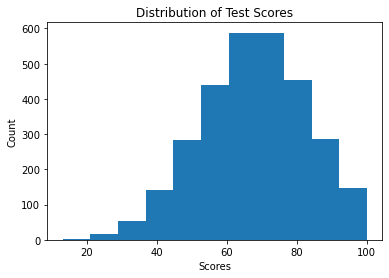

In [19]:
plt.hist(data = test_clean, x = 'score', bins = 11)
plt.title('Distribution of Test Scores')
plt.xlabel('Scores')
plt.ylabel('Count');

**Observation**

Here we can see a non-uniform distribution of data points in different bins. Overall, a generally bimodal and slightly left-skewed distribution is observed.

**Next, lets plot our first supporting feature: test_prep. Is there a significant difference between the status of preparation?**

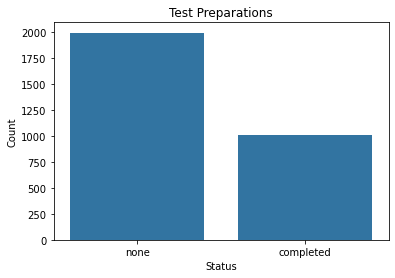

In [20]:
# set uniform color for each bar
base_color = sb.color_palette()[0]

# set each bar in descending order
freq = test_clean['test_prep'].value_counts().index

# plot data
sb.countplot(data = test_clean, x = 'test_prep', color = base_color, order = freq)
plt.title('Test Preparations')
plt.xlabel('Status')
plt.ylabel('Count');

**Observation**

The bar chart shows the mode status for test preparations are students that did not have any test preparation

**For the distribution of subjects. Are all subjects equally represented? Is the distribution symmetrical?**

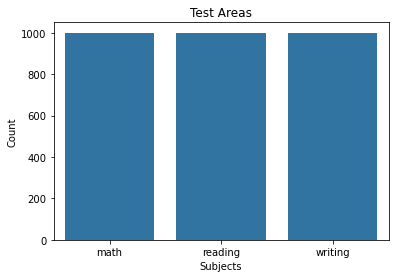

In [21]:
sb.countplot(data = test_clean, x = 'subject', color = base_color)
plt.title('Test Areas')
plt.xlabel('Subjects')
plt.ylabel('Count');

**Observation**

We can observe a uniform distribution of each subject. Students are tested in all subject represented in the dataset 

**Next, let's examine *gender* distribution of the students**

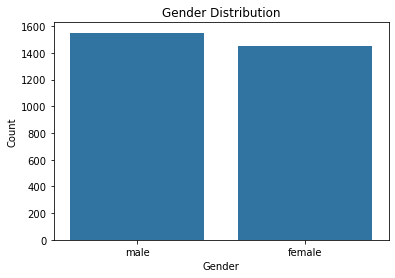

In [22]:
freq_g = test_clean['gender'].value_counts().index
sb.countplot(data = test_clean, x = 'gender', color = base_color, order = freq_g)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count');

**Observation**

The distribution is roughly unimodal, with the data representing more male than female students, although having little significant difference.

**Now, we are going to explore our socio-economic measures: lunch, parent_education, and ethnicity. For each of these measures, are there any unusual points or patterns?**

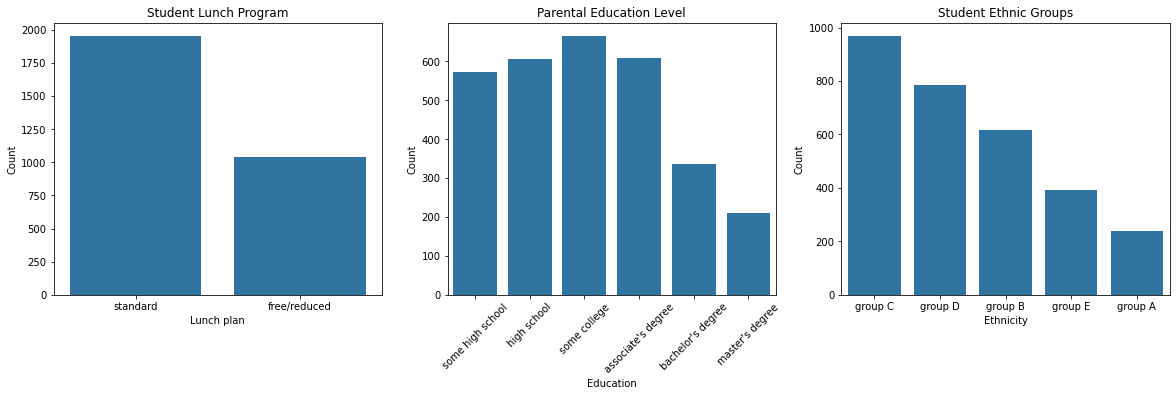

In [23]:
plt.figure(figsize = [20, 5])
# 1st plot
plt.subplot(1,3,1)
freq_l = test_clean.lunch.value_counts().index
sb.countplot(data = test_clean, x = 'lunch', color = base_color, order = freq_l)
plt.title('Student Lunch Program')
plt.xlabel('Lunch plan')
plt.ylabel('Count')

# 2nd plot
plt.subplot(1,3,2)
sb.countplot(data = test_clean, x = 'parent_education', color = base_color)
plt.xticks(rotation = 45)
plt.title('Parental Education Level')
plt.xlabel('Education')
plt.ylabel('Count')

# 3rd plot
plt.subplot(1,3,3)
freq_e = test_clean.ethnicity.value_counts().index
sb.countplot(data = test_clean, x = 'ethnicity', color = base_color, order = freq_e)
plt.title('Student Ethnic Groups')
plt.xlabel('Ethnicity')
plt.ylabel('Count');

**Observation**

**Student Lunch Program** : The most common lunch plan in the dataset is Standard. The difference in frequency is almost twice the antimodal lunch plan

**Parental Education Level** : There is a right skew in data represented. The distribution is bimodal, with the most common Education level belonging to some college, high school, and associate's degree. 

**Student Ethnic Groups** : The chart shows the mode ethnicity for students in the dataset is group C. There is a consistent decrease in the representation of each ethnic group.

## Bivariate Exploration

Now, lets investigate relationships between pairs of each variable explored in our univariate section. Particularly, how each of them relate to test outcomes, *Score*

**To begin, let's see the relationship between *score* and *test_prep*. Is there a significant effect when a student takes a preparatory course?**

In [24]:
# define function
def violingrid(data, x, y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """
    ax = sb.violinplot(data = data, x=x, y=y, color=base_color)
    ax.tick_params(rotation=90)

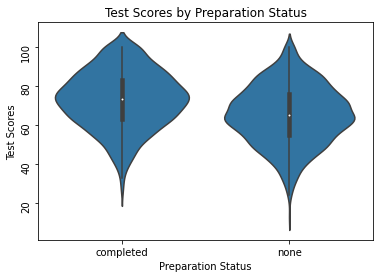

In [25]:
# plot with function
violingrid(test_clean,'test_prep', 'score')
plt.xticks(rotation=0)
plt.title('Test Scores by Preparation Status')
plt.xlabel('Preparation Status')
plt.ylabel('Test Scores');

**Observation**

This violin plot represents a relationship between test preparations and test scores. The box plot element shows the median score of students that completed a test preparation course to be higher than students without test preparations. The plot also shows the highest score for each preparation status as 100, but the shape of the distribution at the peak of the variables indicates a higher probability for students that completed a test preparation course to attain that highest score.

**Next, let's observe the test outcome of each subject. Are students exceling more in a particular subject?**

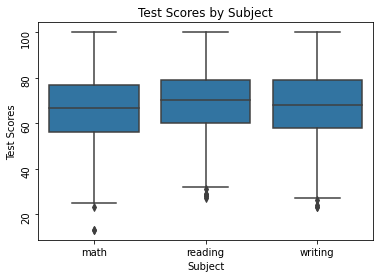

In [26]:
# define function
def boxgrid(data, x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    ax = sb.boxplot(data = data, x=x, y=y, color=base_color)               
    ax.tick_params(rotation=90)
# plot with function
boxgrid(test_clean, 'subject', 'score')
plt.title('Test Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Test Scores')
plt.xticks(rotation = 0);

**Observation**

Comparing the median score of each subject, we can observe student's score more in reading tests than writing and math tests. The lower whiskers also shows math tests tend to have the lowest scores. There are also points below the lower whiskers that indicate outliers.

**Does Gender play a role in the variation of test scores? Let's examine this relationship**

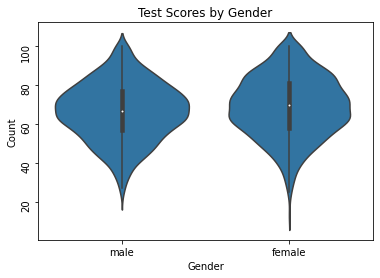

In [27]:
violingrid(test_clean, 'gender','score')
plt.xticks(rotation = 0)
plt.title('Test Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Count');

**Observation**

Here, we can see a slightly higher median test score for female students with a wider distribution of points between the 80-100 mark. Also, the long tail at the bottom for female students indicates outliers with the lowest scores

**Now let's take a look at the relationship between score and the three socio-economic features: *lunch*, *parent_education*, and *ethnicity*. Are there any interesting trends to be seen here?**

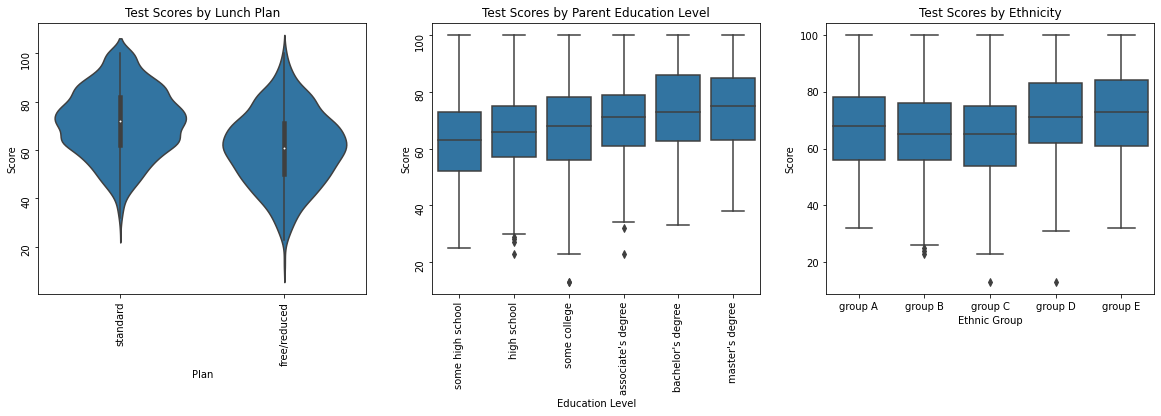

In [28]:
plt.figure(figsize = [20, 5])

# 1st feature
plt.subplot(1,3,1)
violingrid(test_clean, 'lunch', 'score')
plt.title('Test Scores by Lunch Plan')
plt.xlabel('Plan')
plt.ylabel('Score')

# 2nd feature
plt.subplot(1,3,2)
boxgrid(test_clean, 'parent_education', 'score')
plt.title('Test Scores by Parent Education Level')
plt.xlabel('Education Level')
plt.ylabel('Score')

# 3rd feature
plt.subplot(1,3,3)
ethnic_pop = ['group A', 'group B', 'group C', 'group D', 'group E'] #set plot order to alphabetic order
sb.boxplot(data = test_clean, x = 'ethnicity', y = 'score', order = ethnic_pop, color = base_color)
plt.title('Test Scores by Ethnicity')
plt.xlabel('Ethnic Group')
plt.ylabel('Score');

**Observation**

**Test Scores by Lunch** : We can observe the median score for students with a standard lunch plan are notably higher than students eligible for free/reduced lunch plan. The distribution of points at the highest scores are denser for standard than free/reduced plan.

**Test Scores by Parent Education Level** : There's an increasing consistency in test scores as the parent level of education advances, with outlier points present in the most common levels of parent education.

**Test Scores by Ethnicity** : The distribution of scores within each ethnic group, shows no particular pattern, but we can observe some outlier points within the three most common groups.

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does test preparation change across Gender and the three socio-economic measures. In comparing the variables, the outcome of 'test_prep' will be dependent on the other variables, to prevent the distribution of its values affecting the results of the plot, I will use relative frequencies for clear comparisons 

**Test Preparation by Gender**

In [29]:
# group data by gender and test_prep to get the counts of each test prep by gender
gender_prep = test_clean.groupby(['gender', 'test_prep']).count()

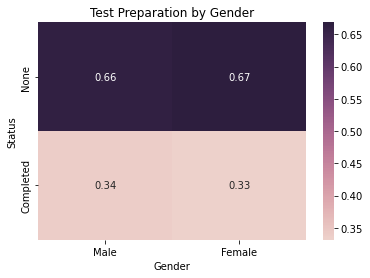

In [30]:
# create dataframe with values for plot
df = pd.DataFrame({'gender': ['Male', 'Female'] , 'none' : [1026, 969], 'completed' : [525, 480]}).set_index('gender')

# function for max proportion, and dropping columns not needed 
def max_prop(df_e, series, series_1):
    df_e['sum'] = series + series_1
    df_e['None'] = series/df_e['sum']
    df_e['Completed'] = series_1/df_e['sum']
    x = series.name
    y = series_1.name
    z = df_e['sum'].name
    df_e.drop([x, y, z], axis = 1, inplace = True)

# return max proportion    
max_prop(df, df['none'], df['completed'])
df = df.transpose() # to place the Gender on the x-axis

# function for heat map
def heatgrid(data, **kwargs):
    ax = sb.heatmap(data = data, annot = True, cmap=sb.cubehelix_palette(as_cmap=True))               

# plot heatmap
heatgrid(df)
plt.title('Test Preparation by Gender')
plt.xlabel('Gender')
plt.ylabel('Status');

**Observation**

The heat map shows the proportion of Gender by status of Test Preparations. With a 1% difference in each group, there isn't any significant effect in test preparations relative to the gender of the student.

**Test Preparation by Lunch**

In [31]:
lunch_prep = test_clean.groupby(['lunch', 'test_prep']).count()
lunch_prep

id  gender  ethnicity  parent_education  subject  \
lunch        test_prep                                                       
free/reduced completed   330     330        330               330      330   
             none        714     714        714               714      714   
standard     completed   675     675        675               675      675   
             none       1281    1281       1281              1281     1281   

                        score  
lunch        test_prep         
free/reduced completed    330  
             none         714  
standard     completed    675  
             none        1281

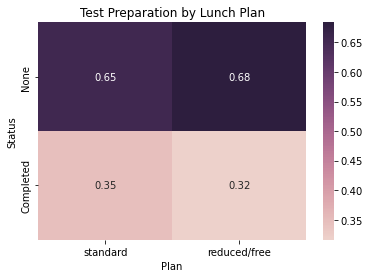

In [32]:
# create dataframe with values for plot
df1 = pd.DataFrame({'lunch': ['standard', 'reduced/free'] , 'none' : [1281, 714], 'completed' : [675, 330]}).set_index('lunch')

# calculate for proportions
max_prop(df1, df1['none'], df1['completed'])
df1 = df1.transpose() # to place the Lunch Plan on the x-axis

# plot
heatgrid(df1)
plt.title('Test Preparation by Lunch Plan')
plt.xlabel('Plan')
plt.ylabel('Status');

**Observation**

There's a 3% increase of completed test preparations in the sample of students that fit the standard lunch plan, and 3% increase in no test preparations with students that fit the reduced/free lunch plans.

**Test Preparations by Parent_Education**

In [33]:
parent_prep = test_clean.groupby(['parent_education', 'test_prep']).count()
parent_prep

id  gender  ethnicity  lunch  subject  score
parent_education   test_prep                                               
some high school   completed  189     189        189    189      189    189
                   none       384     384        384    384      384    384
high school        completed  171     171        171    171      171    171
                   none       435     435        435    435      435    435
some college       completed  246     246        246    246      246    246
                   none       420     420        420    420      420    420
associate's degree completed  225     225        225    225      225    225
                   none       384     384        384    384      384    384
bachelor's degree  completed  117     117        117    117      117    117
                   none       219     219        219    219      219    219
master's degree    completed   57      57         57     57       57     57
                   none       153     153        153    153      153    153

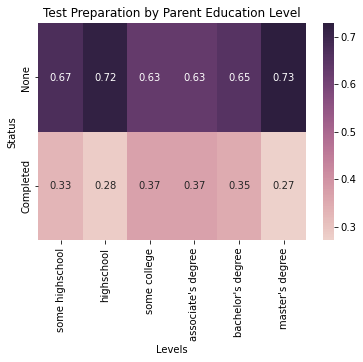

In [34]:
# create dataframe with values for plot
df2 = pd.DataFrame({'level': ['some highschool', 'highschool', 'some college', "associate's degree", "bachelor's degree", "master's degree"] , 'none' : [384, 435, 420, 384, 219, 153], 'completed' : [189, 171, 246, 225, 117, 57]}).set_index('level')

# calculate for proportions
max_prop(df2, df2['none'], df2['completed'])
df2 = df2.transpose() # to place the parent level of education on the x-axis

# plot
heatgrid(df2)
plt.title('Test Preparation by Parent Education Level')
plt.xlabel('Levels')
plt.ylabel('Status');

**Observation**

Interestingly, parents with master's degree have the lowest rate of students completing preparation courses

**Test Preparations by Ethnicity**

In [35]:
ethnicity_prep = test_clean.groupby(['ethnicity', 'test_prep']).count()
ethnicity_prep

id  gender  parent_education  lunch  subject  score
ethnicity test_prep                                                      
group A   completed   96      96                96     96       96     96
          none       141     141               141    141      141    141
group B   completed  216     216               216    216      216    216
          none       399     399               399    399      399    399
group C   completed  306     306               306    306      306    306
          none       663     663               663    663      663    663
group D   completed  252     252               252    252      252    252
          none       534     534               534    534      534    534
group E   completed  135     135               135    135      135    135
          none       258     258               258    258      258    258

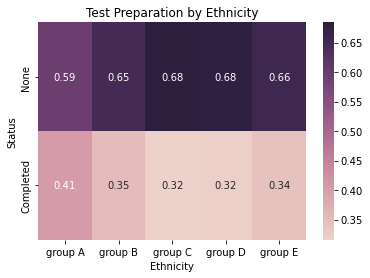

In [36]:
# create dataframe with values for plot
df3 = pd.DataFrame({'ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'] , 'none' : [141, 399, 663, 534, 258], 'completed' : [96, 216, 306, 252, 135]}).set_index('ethnicity')

# calculate for proportions
max_prop(df3, df3['none'], df3['completed'])
df3 = df3.transpose() # to place the Ethnicity on the x-axis

# plot
heatgrid(df3)
plt.title('Test Preparation by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Status');

**Observation**

We can observe that the least dominant ethnic group, group A has the highest rate of students that completed test preparation courses

## Multivariate Exploration

In the previous sections, we observed the median test score increased with female students, students eligible for standard lunch plans, when a student completed a test preparatory course, and also as the parent education level increases. We investigated the dynamics of the test preparatory course, and unintuitively saw that the rate of students that took a preparatory course were notably low with parents having the highest level of education, and they mostly fit into the standard lunch plan. Another interesting result is the percentage of students that completed test preparatory course in the least populated ethnic group, the plot revealed a proportion of 41% which is considerable higher than the other groups.

In this section, we will depict these interaction effects through the use of multivariate plots.

**Does Gender really influence test outcomes? Let's observe the outcome in each subject**

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


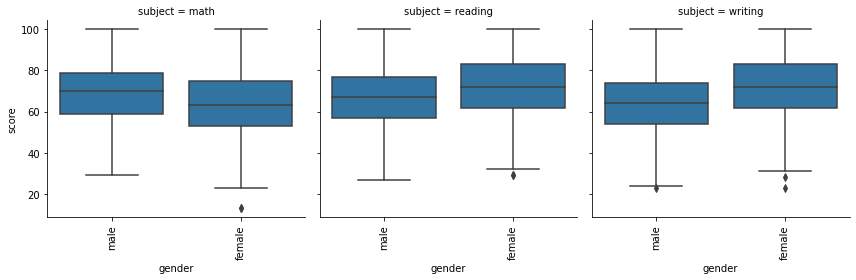

In [37]:
def facetgrid(data, col, x_axis, y_axis):
    g = sb.FacetGrid(data = data, col = col, height = 4)
    g.map(sb.boxplot, x_axis, y_axis)
    # rotate tick labels
    for axes in g.axes.flat:
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    plt.tight_layout();

facetgrid(test_clean, 'subject', 'gender', 'score');

**Observation**

Now we can see the variation of test scores for both genders based on the median, the subject variable helps us understand that female students excel more in Reading and Writing, while male students excel more at Math.

**Let's examine the relationship between test scores, test preparatory course and parent level of education. Is there a difference in test scores when a student completes preparations despite the parent education level?**

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


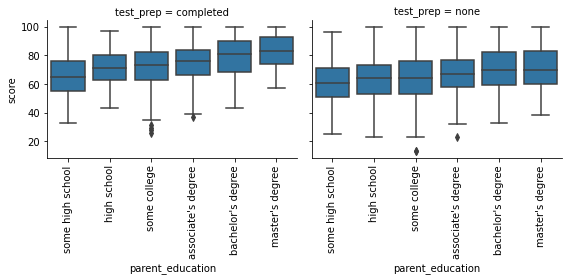

In [38]:
facetgrid(test_clean, 'test_prep', 'parent_education', 'score')

**Observation**

We can observe the test scores increasing across each group. A key thing to note is difference in median scores of each group, the scores for completed preparations are higher than no preparation courses.

**Now, let's see an interaction of each ethnic group to test preparations and its effect on test scores**

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


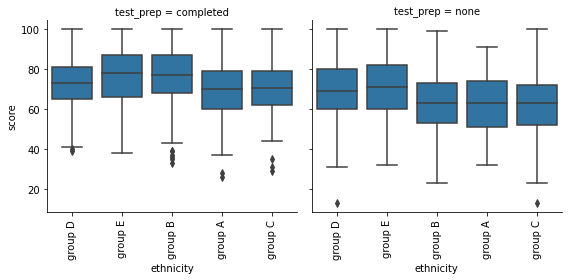

In [39]:
facetgrid(test_clean, 'test_prep', 'ethnicity', 'score')

**Observation**

In the box plot, the ethnic groups are arranged in order of decreasing popularity. The median scores for completed test preparations are higher with each ethnic group compared to no test preparations. Also, the height of the IQR for group A, is comparatively shorter in completed preparations than in no preparations. This suggests that students in this group have a higher level of agreement in scores compared to the other group

**Let's examine the other socio-economic factors on test scores by test preparations**

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


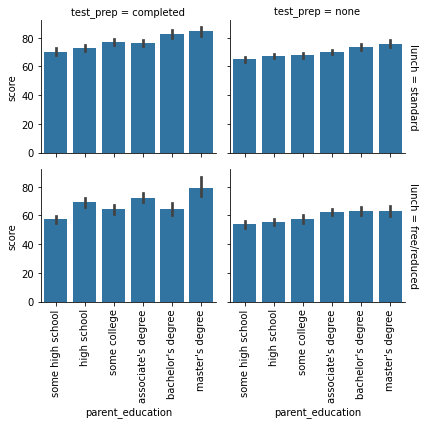

In [41]:
# plot chart
g = sb.FacetGrid(data = test_clean, col = 'test_prep', row = 'lunch', margin_titles = True)
g.map(sb.barplot, 'parent_education', 'score');
# rotate tick labels
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout();

**Observations**

We can observe that although the test scores increase with a consistent rise of these factors, students who completed the preparatory course, obtain higher scores than students without a test preparatory course

## Conclusions

- In comparing the test preparations across the parent's education level, and ethnic group A, which is associated with a high rate of completing preparation courses, we have been able to measure how effective test preparation courses are by the notable difference in test scores seen across each group.

- We have also uncovered some determining factors of test outcomes. We know that subject plays a role by the distribution of scores in math to reading and writing based on the gender of the student. Socio-Economic factors like Lunch plan, which measures the household income of each student, Parent Level of Education which accounts for family environment and support, and Ethnicity which measures school support in minority represented groups are key factors in test scores. 

- Based on the data, to improve the test scores for students, I will suggest an increase in the engagement of test preparation courses, particularly on the subject each gender was shown to be weaker at, and an introduction of school related motivational and engagement activities targeted at students with low parental education background.

In [ ]:
# save cleaned dataframe for Part II project
#test_clean.to_csv('C:/Users/Administrator/Documents/ALX-T Nano degree/project-communicate-data-findings/project/test_clean.csv')